# Problem Statement - 1
Prepare the data for modelling, This will include
- Converting to lowercase
- Removing stopwords
- Lemmatization
- Stemming
- Removing numbers 

### Do it all in 1 function

# Problem Statement - 2
Once the data has been cleaned :-
- Convert the data into vectors with Count Vectorizer. (No train-test required)
- Fit the K-means Clustering Algorithm on your vectors with n_clusters set to 5


------------

![](https://media.tenor.com/d8fG2J6pkAUAAAAC/friends-chandler.gif)

# A hint
The file is stores as a ```tsv```.

You can load a ```tsv``` file with ```pd.read_csv``` while passing the seperator or ```sep``` argument as ```\t```.

This tells pandas that the file is seperated by tab's instead of comma's

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words("english")
from nltk.stem.snowball import SnowballStemmer
sn_stemmer = SnowballStemmer("english")
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# QUESTION - 1

In [5]:
def new_function(x):
    x = x.lower()
    y=nltk.word_tokenize(x)
    temp=[]
    for i in y:
        if i in stopwords.words("english"): 
             pass
        else:
             temp.append(i)
    stop=' '.join(temp)
    
    c=nltk.word_tokenize(stop)
    temp2=[]
    for i in c:
        temp2.append(lemmatizer.lemmatize(i))
        lem=' '.join(temp2)
        
    d=nltk.word_tokenize(lem)
    temp3 = []
    for i in d:
        temp3.append((sn_stemmer.stem(i)))
        stem=' '.join(temp3)

    temp4 = []
    for i in stem:
        if i.isdigit():
            pass
        else:
            temp4.append(i)
        number =''.join(temp4)
    return(number)

In [6]:
df['Clean Msg'] = df['Review'].apply(new_function)

In [7]:
df

,Review,Liked,Clean Msg
0,Wow... Loved this place.,1,wow ... love place .
1,Crust is not good.,0,crust good .
2,Not tasty and the texture was just nasty.,0,tasti textur nasti .
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price .
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor textur lack .
996,Appetite instantly gone.,0,appetit instant gone .
997,Overall I was not impressed and would not go b...,0,overal impress would go back .
998,"The whole experience was underwhelming, and I ...",0,"whole experi underwhelm , think ll go ninja su..."


In [ ]:
# QUESTION - 2

In [8]:
X = df['Clean Msg']

In [9]:
vectorizer = CountVectorizer()

In [10]:
vectorizer.fit(X)

CountVectorizer()

In [11]:
vectorizer.transform(X)

<1000x1566 sparse matrix of type '<class 'numpy.int64'>'
	with 5434 stored elements in Compressed Sparse Row format>

In [12]:
X_vectors = vectorizer.transform(X)

In [13]:
vectorizer.get_feature_names_out()[0:100]

array(['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accord',
       'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford',
       'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'al', 'ala',
       'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also',
       'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount',
       'ampl', 'and', 'andddd', 'angri', 'annoy', 'anoth', 'anticip',
       'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog',
       'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl',
       'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv',
       'articl', 'ask', 'assur', 'ate', 'atmospher', 'atmosphere',
       'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju',
       'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom',
       'awkward', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon',
       'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana',
       'bank

In [14]:
X_vectors

<1000x1566 sparse matrix of type '<class 'numpy.int64'>'
	with 5434 stored elements in Compressed Sparse Row format>

In [16]:
km = KMeans(n_clusters=5)

In [17]:
km_model = km.fit(X_vectors)

In [18]:
y_km = km.predict(X_vectors)

In [19]:
y_km

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 2, 3,
       1, 0, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 2, 1,
       3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 0, 1, 2, 3, 3,

In [20]:
km.labels_

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 2, 3,
       1, 0, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 2, 1,
       3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 0, 1, 2, 3, 3,

In [21]:
km.cluster_centers_

array([[0.01234568, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01001431, 0.00143062, 0.        , ..., 0.00286123, 0.00572246,
        0.00715308],
       [0.        , 0.        , 0.00961538, ..., 0.        , 0.        ,
        0.        ],
       [0.00869565, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
temp=[]
for i in range(4):
    km = KMeans(
        n_clusters=i+1,
    )
    km.fit(X_vectors)
    temp.append(km.inertia_)

In [23]:
temp

[5689.892999999999, 5578.496138515197, 5534.247831754145, 5389.939783549782]

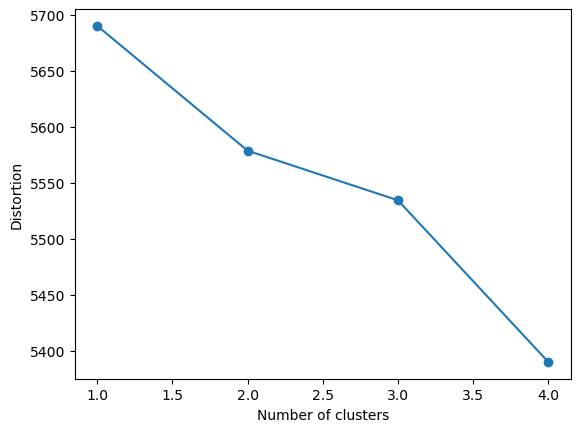

In [24]:
# plot
plt.plot(range(1, 5), temp, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()